In [181]:
#Decision Tree Classification

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
import pandas as pd
data = pd.read_csv("drive/My Drive/Colab Notebooks/Datasets/Social_Network_Ads.csv")
dataset = data
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [184]:
#split independent variable

dataset
X = dataset.iloc[:, 2:4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [185]:
dataset
X1 = dataset.iloc[:, 2:4].values
X1

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [186]:
#Split dependent variable
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [187]:
y1 = dataset.iloc[:, -1].values
y1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [188]:
#Split data into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [189]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [190]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [191]:
from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)

In [192]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [193]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier1.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=0)

In [194]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [195]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [196]:
y1_pred = classifier1.predict(X1_test)
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [197]:
y1_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  9],
       [ 4, 37]])

In [199]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y1_test, y1_pred)
cm1

array([[53,  5],
       [ 3, 19]])

In [200]:
Accuracy_entropy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
Accuracy_entropy

np.float64(0.8916666666666667)

In [201]:
Accuracy_gini = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][0]+cm1[1][1])
Accuracy_gini

np.float64(0.9)

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.80      0.90      0.85        41

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.90      0.89      0.89       120



In [203]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



In [204]:
import numpy as np
height, width = 4, 5
num = ['test_size_entropy', 'precision', 'recall', 'f1-score', 'accuracy', '0.2', '0.79', '0.86', '0.83', '0.90', '0.25', '0.83', '0.91', '0.87', '0.91', '0.3', '0.80', '0.90', '0.85', '0.89']
array = np.array(num).reshape(height, width)
array

array([['test_size_entropy', 'precision', 'recall', 'f1-score',
        'accuracy'],
       ['0.2', '0.79', '0.86', '0.83', '0.90'],
       ['0.25', '0.83', '0.91', '0.87', '0.91'],
       ['0.3', '0.80', '0.90', '0.85', '0.89']], dtype='<U17')

In [207]:
import numpy as np
height, width = 4, 5
num = ['test_size_gini', 'precision', 'recall', 'f1-score', 'accuracy', '0.2', '0.80', '0.91', '0.85', '0.90', '0.25', '0.82', '0.88', '0.85', '0.90', '0.3', '0.80', '0.85', '0.82', '0.88']
array = np.array(num).reshape(height, width)
array

array([['test_size_gini', 'precision', 'recall', 'f1-score', 'accuracy'],
       ['0.2', '0.80', '0.91', '0.85', '0.90'],
       ['0.25', '0.82', '0.88', '0.85', '0.90'],
       ['0.3', '0.80', '0.85', '0.82', '0.88']], dtype='<U14')

In [209]:
new_individual = np.array([[49, 40000]])
new_individual_scaled = sc_X.transform(new_individual)
prediction = classifier.predict(new_individual_scaled)

if prediction[0] == 1:
  print("The individual is predicted to purchase")
else:
  print("The individual is predicted not to purchase")

The individual is predicted to purchase


In [211]:
new_individual = np.array([[49, 40000]])
new_individual_scaled = sc_X1.transform(new_individual)
prediction = classifier1.predict(new_individual_scaled)

if prediction[0] == 1:
  print("The individual is predicted to purchase")
else:
  print("The individual is predicted not to purchase")

The individual is predicted to purchase


[Text(0.4875, 0.9615384615384616, 'x[0] <= 0.553\nentropy = 0.946\nsamples = 280\nvalue = [178, 102]'),
 Text(0.2571428571428571, 0.8846153846153846, 'x[1] <= 0.598\nentropy = 0.676\nsamples = 202\nvalue = [166, 36]'),
 Text(0.3723214285714286, 0.9230769230769231, 'True  '),
 Text(0.14285714285714285, 0.8076923076923077, 'x[0] <= -0.134\nentropy = 0.224\nsamples = 166\nvalue = [160, 6]'),
 Text(0.11428571428571428, 0.7307692307692307, 'entropy = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(0.17142857142857143, 0.7307692307692307, 'x[1] <= 0.396\nentropy = 0.485\nsamples = 57\nvalue = [51, 6]'),
 Text(0.14285714285714285, 0.6538461538461539, 'x[1] <= -0.067\nentropy = 0.376\nsamples = 55\nvalue = [51, 4]'),
 Text(0.11428571428571428, 0.5769230769230769, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.17142857142857143, 0.5769230769230769, 'x[1] <= 0.02\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]'),
 Text(0.14285714285714285, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]

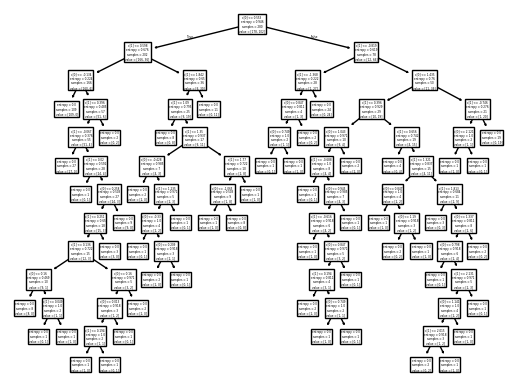

In [210]:
from sklearn import tree
tree.plot_tree(classifier)

[Text(0.44622093023255816, 0.9666666666666667, 'x[0] <= 0.611\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.2441860465116279, 0.9, 'x[1] <= 0.596\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.345203488372093, 0.9333333333333333, 'True  '),
 Text(0.16279069767441862, 0.8333333333333334, 'x[0] <= -0.167\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.13953488372093023, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.18604651162790697, 0.7666666666666667, 'x[1] <= 0.393\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.16279069767441862, 0.7, 'x[1] <= -0.07\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.13953488372093023, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.18604651162790697, 0.6333333333333333, 'x[1] <= 0.017\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.16279069767441862, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20930232558139536, 0

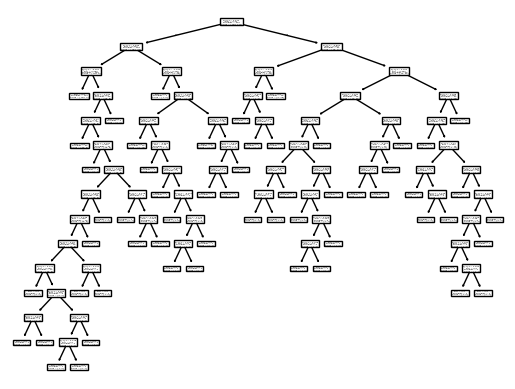

In [212]:
from sklearn import tree
tree.plot_tree(classifier1)